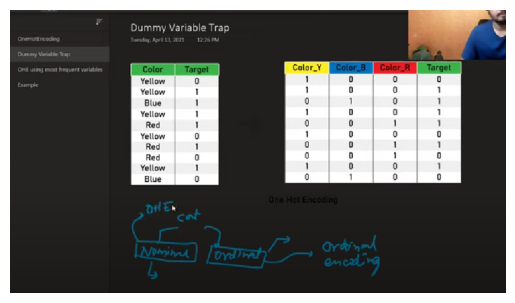

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = r"C:\Users\HP\Pictures\Screenshots\Screenshot 2025-02-26 235526.png"

img = mpimg.imread(image_path)

# Show the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

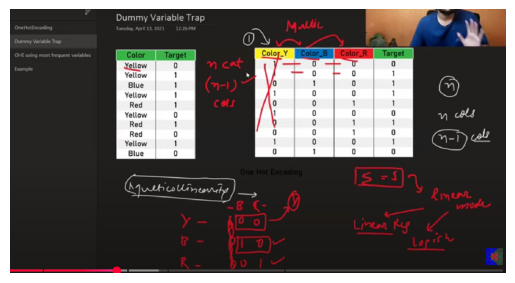

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = r"C:\Users\HP\Pictures\Screenshots\Screenshot 2025-02-27 000819.png"

img = mpimg.imread(image_path)

# Show the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

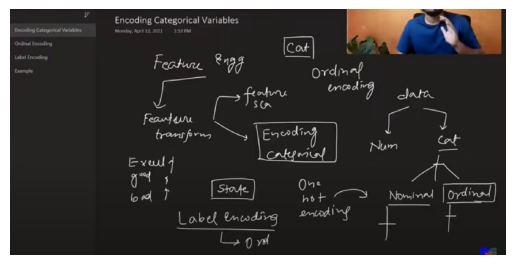

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = r"C:\Users\HP\Pictures\Screenshots\Screenshot 2025-02-26 232615.png"

img = mpimg.imread(image_path)

# Show the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('cars.csv')

In [6]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [7]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

# 1. OneHotEncoding using Pandas

In [8]:
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


# 2. K-1 OneHotEncoding

In [9]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


# 3. OneHotEncoding using Sklearn


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [11]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [12]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)

In [22]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [23]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [24]:
X_train_new.shape

(6502, 7)

In [25]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

# 4. OneHotEncoding with Top Categories

In [26]:
counts = df['brand'].value_counts()

In [27]:
df['brand'].nunique()
threshold = 100

In [28]:
repl = counts[counts <= threshold].index

In [29]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
6859,False,False,False,False,True,False,False,False,False,False,False,False,False
834,False,False,True,False,False,False,False,False,False,False,False,False,False
2562,False,False,False,False,False,True,False,False,False,False,False,False,False
6624,False,False,False,False,False,True,False,False,False,False,False,False,False
7514,False,False,False,True,False,False,False,False,False,False,False,False,False
